# Data Mining Final Project - Notebook 1
### Datasets :
   > ### Car Evaluation Dataset
   > ### Wine Quality Dataset (White)
### Authors:
> ### Francisco Cunha, 76759
> ### João Amaral, 76460

The following notebook containts the development stages of the analysis and classifier modeling of a dataset, done for the final project of the course 44152 - Data Mining at University of Aveiro.
The project requested that the students selected two different datasets and apply common data mining techniques in order to extract patterns and predict behavior in the studied data (train classifiers). The students were required to freely select two datasets to develop the project, the only restriction being one of them had to contain some sort of categorical attributes. The first dataset chosen was the the Car Evaluation Dataset, containing categorical attributes, which is available at https://archive.ics.uci.edu/ml/datasets/Car+Evaluation. The second dataset chosen was the Wine Quality Dataset, available at https://archive.ics.uci.edu/ml/datasets/Wine+Quality. It contains two datasets one for red and other for white whine. The white wine one was then chosen.

The assignment of the project required the delivery of two notebooks, one containing only the data pre-processing and classifier modeling for both chosen datasets, while the second contains the complete processing including a cross validation scheme implementation and the justification for its selection.

This notebook corresponds to the first one, and as such, the notebook is then divided into 2 main stages, corresponding to the data mining stages we already studied in the theorethical classes:
    - Task A : Pre-processing stage
    - Task B : Training model stage
    
In order to ease the reading of the notebook, both tasks were applied separately to each dataset and here displayed in two separate sections:
- [Dataset 1: Car Evaluation Dataset](#Dataset-1-:-Car-Evaluation-Dataset)
    - [Task A: Car Pre-processing](#Task-A:-Car-Pre-processing)
    - [Task B: Car Model training](#Task-B:-Car-Model-training)
- [Dataset 2: White wine quality dataset](#Dataset-2-:-White-wine-quality-dataset)
    - [Task A: Wine Pre-processing](#Task-A:-Wine-Pre-processing)
    - [Task B: Wine Model Training](#Task-B:-Wine-Model-Training)
- [References](#References)

# Dataset 1 : Car Evaluation Dataset
## Task A: Car Pre-processing 

- [Car CSV's File Reading](#Car-CSV's-File-Reading)
- [Car Attributes and classes sample values](#Car-Attributes-and-classes-sample-values)
- [Car Mapping categorical attributes to numeric](#Car-Mapping-categorial-attributes-to-numeric)
- [Car Class distribution visualization](#Car-Class-distribution-visualization)
- [Car Dataset detailed description](#Car-Dataset-detailed-description)
- [Car Attribute and class plotting examples](#Car-Attribute-and-class-plotting-examples)
- [Car Correlation matrix heatmap](#Car-Correlation-matrix-heatmap)
- [Car Feature ranking](#Car-Feature-ranking)
- [Car Feature scaling](#Car-Feature-scaling)
- [Car Dimension reduction](#Car-Dimension-reduction)
    - [Car Principal Component Analysis (PCA)](#Car-Principal-Component-Analysis-(PCA))
    - [Car Kernel PCA](#Car-Kernel-PCA)

### Car CSV's File Reading

The first step of the pre-processing stage corresponds to the reading of the CSV file which contains the dataset to be processed. The Python Data Analysis Library (pandas) method read_csv() makes this possible by reading the dataset and creating a dataframe object containing the full attributes values and feature names, arranged in a two dimensional table. Before procceeding any further lets also make sure our dataset is complete, meaning no missing values. As we can see below, there are no missing values for any of the existing attributes. In case there were missing values an adequate replacement strategy would have to be here considered, such as invalidating the row containing the missing value or to replace the missing value with the mean of the attribute it corresponds to.

In [4]:
import pandas as pd
from pandas import DataFrame

#Disable warning
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [5]:
# Load dataframes from data set CSV files
dataset_car = pd.read_csv('./car.csv') # categorical: https://archive.ics.uci.edu/ml/datasets/Car+Evaluation

dataset_car.isnull().any()

buying          False
maint           False
doors           False
persons         False
lug_boot        False
safety          False
class values    False
dtype: bool

### Car Attributes and classes sample values

With the dataset now loaded we can get a glimpse of its data and internal organization by visualizing its first five intances.
The first six columns correspond to the features of the data (buying, maint,..., safety) while the last one, "class values", corresponds to a metric that represents how good the car, composed by the previous attributes, was rated on a scale between unacc (unaccurate) to vgood (very good).

In [6]:
dataset_car.head() # shows only the first 5 instances on the data set

,buying,maint,doors,persons,lug_boot,safety,class values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Car Mapping categorical attributes to numeric

Now that we know how the data is organized, lets map the categorical attributes to numeric, in order to do later some operations like feature ranking and dimension reduction. To do so, all the categorical attributes (buying, maint,...,class values) are going to be transformed such as the value low from feature 'buying' will get the value 1, and so on for all the features. For the 'class values', it will be replace the value 'unacc' to 1, 'acc' to 2, 'good' to 3 and 'vgood' to 4

In [7]:
# Dictionary containing the mapping to be done in order 
# to convert categorical attributes to numeric ones
# Not the most efficient method but we decide to which
# numerical value each attribue will be converted to
numeric_map = {
	'buying' : { 'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'maint' : {'low' : 1, 'med' : 2, 'high' : 3, 'vhigh': 4 },
	'doors' : { '2' : 1, '3' : 2, '4' : 3, '5more' : 4 },
	'persons' : {'2' : 1, '4' : 2, 'more' : 3 },
	'lug_boot' : {'small' : 1,'med': 2, 'big': 3 },
	'safety' : {'low' : 1, 'med' : 2, 'high': 3 }
}

for m in numeric_map:
	dataset_car[m] = dataset_car[m].map(numeric_map[m])

# classes values mapping to numeric values
dataset_car['class values'].replace(('unacc','acc','good','vgood'),(1,2,3,4), inplace=True)

dataset_car.head()

,buying,maint,doors,persons,lug_boot,safety,class values
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


### Car Class distribution visualization

Now that we know how the data is organized we can start to plot it in graphs to better grasp some of its inner properties such as class distribution. To the simple plotting and data analysis techniques of the dataset, data scientists gave the name of __Univariate analysis__. It corresponds to the simplest form of data analysis or visualization where one is only concerned with analyzing one data attribute or variable and visualizing the same (in one dimension). Lets consider the class attribute and visualize its distribution. From the observation of the histogram below we can conclude that the samples have a positive skew with the majority of the samples belonging to the class 1 ('unacceptable') and 2 ('acceptable').

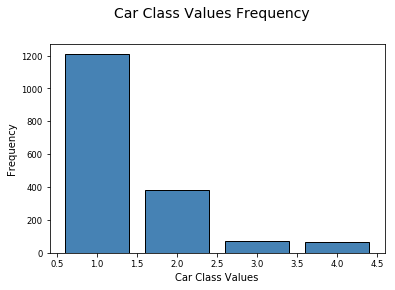

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt 

fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Car Class Values Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Car Class Values")
ax.set_ylabel("Frequency") 
car_cv = dataset_car['class values'].value_counts()
#car_cv = Y_car.value_counts()
car_cv = (list(car_cv.index), list(car_cv.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(car_cv[0], car_cv[1], color='steelblue', 
        edgecolor='black', linewidth=1)

### Car Dataset detailed description

Now lets apply the same technique to the whole dataset attributes in order to get a better understanding of the data distribution of these features. The describe() method of a dataframe can also give us some more detailed information for each of the datset attributes: the mean attribute value, the standard deviation, its minimum and maximum values and 25, 50 and 75 percentiles. The histograms below present helps visualize the value distribution of each attribute. From its analysis we can observe that there is no skewing in all of the input features which could imply that their multivariate intercorrelation is what is causing the skew of the classes that we previously seen.

Car Dataset description
 


,buying,maint,doors,persons,lug_boot,safety,class values
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.414931
std,1.118358,1.118358,1.118358,0.816733,0.816733,0.816733,0.740700
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,1.750000,1.750000,1.000000,1.000000,1.000000,1.000000
50%,2.500000,2.500000,2.500000,2.000000,2.000000,2.000000,1.000000
75%,3.250000,3.250000,3.250000,3.000000,3.000000,3.000000,2.000000
max,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000


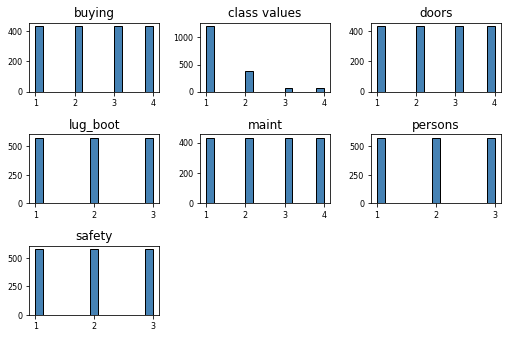

In [9]:
print("Car Dataset description\n ")
display(dataset_car.describe())

dataset_car.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Car Attribute and class plotting examples

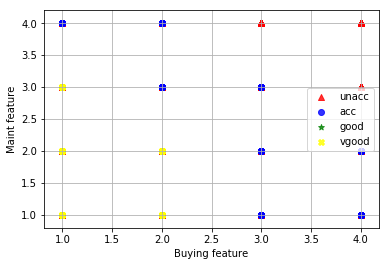

In [10]:
labels_car = dataset_car.as_matrix(columns=[dataset_car.columns[-1]]) # Y
attributes_car = dataset_car.as_matrix(columns=dataset_car.columns[0:6]) # X
labels_car = labels_car.reshape(labels_car.size)

plt.scatter(attributes_car[labels_car==1, 0],attributes_car[labels_car==1,1], color='red', marker='^', alpha=0.8)
plt.scatter(attributes_car[labels_car==2, 0],attributes_car[labels_car==2,1], color='blue', marker='o', alpha=0.8)
plt.scatter(attributes_car[labels_car==3, 0],attributes_car[labels_car==3,1], color='green', marker='*', alpha=0.8)
plt.scatter(attributes_car[labels_car==4, 0],attributes_car[labels_car==4,1], color='yellow', marker='X', alpha=0.8)
plt.xlabel("Buying feature")
plt.ylabel("Maint feature")
plt.legend(["unacc", "acc", "good", "vgood"])
plt.grid()
plt.show()

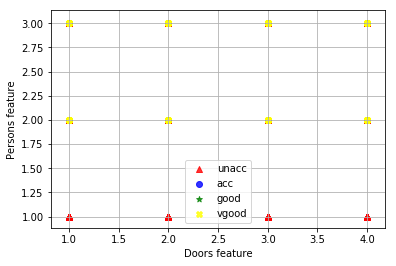

In [11]:
plt.scatter(attributes_car[labels_car==1, 2],attributes_car[labels_car==1,3], color='red', marker='^', alpha=0.8)
plt.scatter(attributes_car[labels_car==2, 2],attributes_car[labels_car==2,3], color='blue', marker='o', alpha=0.8)
plt.scatter(attributes_car[labels_car==3, 2],attributes_car[labels_car==3,3], color='green', marker='*', alpha=0.8)
plt.scatter(attributes_car[labels_car==4, 2],attributes_car[labels_car==4,3], color='yellow', marker='X', alpha=0.8)
plt.xlabel("Doors feature")
plt.ylabel("Persons feature")
plt.legend(["unacc", "acc", "good", "vgood"])
plt.grid()
plt.show()

### Car Correlation matrix heatmap

In order to further study our dataset it is important to discover if there are any feature dependencies between features, usually designed as feature correlation, and which ones might influence the quality rating the most. Here we introduce the concept of  __Multivariate Analysis__ which involves the analysis of multiple data dimensions (attributes), referring to 2 or more. More than just analysing the attribute distributions it extends this analysis to discover possible existing relationships between attributes, as well as other patterns and correlations.

One of the best methods used to study this behavior is to compute and visualize the correlation matrix of the dataset. A heatmap plot can be seen in the figures below, where pair-wise attributes properties are analysed together.

We can observe that there is no correlation at all between input feature pairs, meaning that they don't depend from one another. The existing correlation is however present in the pairs between input features and the class value.

For example the attribute pair "persons" X "class values" and "safety" X "class values" have higher dependencies (correlation) between them (indicated by the higher positive values of the heatmap). Simply put, this means that if one of those values where to increase, its pair attribute would also increase. It can also show us the inverse property, displayed in the squares with negative values, representing an inverse co-relationship. Meaning that the more one of those values increases, the more its pair decreases. The other remaining squares in the heatmap, with values close to zero, represent a lack of dependency between the features.

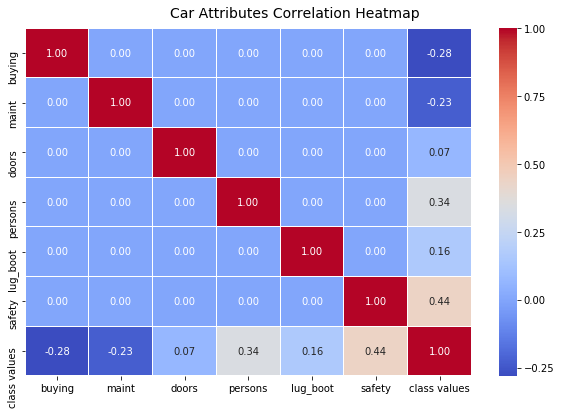

In [12]:
import seaborn as sns

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset_car.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Car Attributes Correlation Heatmap', fontsize=14)

We can go further to comprove the accuracy of the correlations presented in the heatmap by studying some attribute pair. Let's then consider the pair above mentioned, "class values" X "safety", which have positive correlation, and the pair "buying" X "class values" with negative correlation. In the following figure there is present both the regression plot of the two features and their respective distribution plots.

In the first figure the pair "buying" X "class values" is displayed and it confirms that, being a negative value correlation pair in the heatmap (with value -0.28), as the values of buying increase, it's overall class value decreases. The opposite occurrence is shown in the other figure where as the "safety" values increases, the "class values"increased as well which, in a semantic approach, seems quite reasonable since if the safety evaluation of the car is rated as high it implies that it's overall labeled quality is going to also be higher.

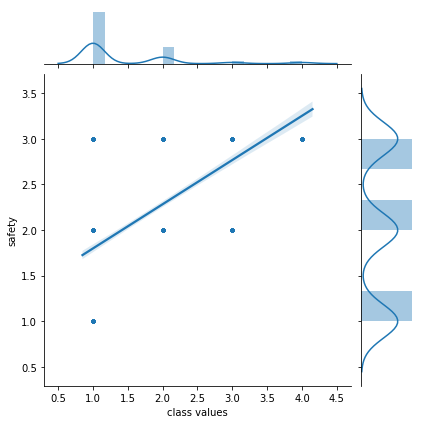

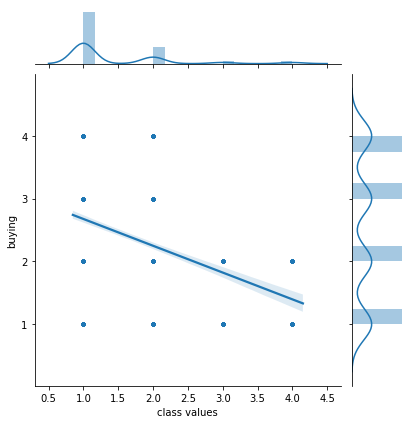

In [10]:
# We consider a new dataframe only for alcohol and density attributes
class_safety = dataset_car[['class values', 'safety']] 
#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="class values", y="safety", data=class_safety, height=6) #Draw the regression plot
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot) # Draw the distribution plot on the same figure

class_buying = dataset_car[['class values', 'buying']]
gridB = sns.JointGrid(x="class values", y="buying", data=class_buying, height=6)
gridB = gridB.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridB = gridB.plot_marginals(sns.distplot)

### Car Feature ranking

One important step in data pre-processing is the identification and selection of the best features that are going to be used to solve the classification problem. Usually there are features in a dataset that are not relevant or are redundant for the classifier and that can even, in fact, decrease the accuracy of the model. As such, the feature selection methods aid us in this mission of creating the accurate predictive model by choosing features that will give us a simillar or even better accuracy whilst requiring less data. One misconception that usually exists is that more attributes or column data has a direct correlation with the accuracy obtained, which is wrong. In fact, fewer attributes is sometimes the most desirable in a dataset, since it decreases the complexity of the model, making it simpler to analize and understand.

For our problem, we have considered two feature selection techniques: the __Shapiro-Wilk__ ranking algorithm and a __chi squared statistical test__ to select the 3 best features out of the existing 6.

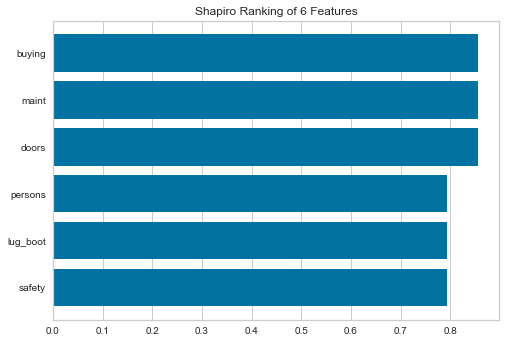

In [11]:
from yellowbrick.features import Rank1D

features = list(dataset_car.columns[0:6])

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(attributes_car, labels_car)	# Fit the data to the visualizer
visualizer.transform(attributes_car)	# Transform the data
visualizer.poof()

Resulting scores:
[  80.73279   60.15163    4.13638   89.02076   17.13189  130.1518 ]

Resulting 3 best features:


[('safety', 130.15180111390586),
 ('persons', 89.020760403134418),
 ('buying', 80.732790977961429)]

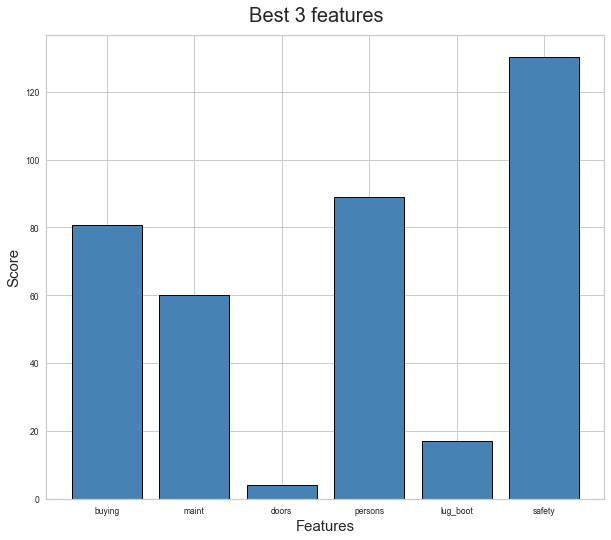

In [12]:
# Univariate Selection -> Statistical tests can be used to select those features that have the strongest 
                        # relationship with the output variable.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy

array = dataset_car.values
features = dataset_car.columns[0:6]
X = array[:,0:6]
Y = array[:,6]

# feature extraction
n_best_features = 3
test_car = SelectKBest(score_func = chi2, k = n_best_features) 
fit_car = test_car.fit(attributes_car, labels_car) # Run score function on (X, Y) and get the appropriate features.

# summarize scores 
numpy.set_printoptions(precision = 5) # sets precision to 5 numbers

# generalized code for obtaining any n_best_features
print("Resulting scores:\n{}".format(fit_car.scores_))
result = dict(zip(list(features),fit_car.scores_))
print("\nResulting {} best features:".format(n_best_features))
display(sorted(result.items(), key=lambda kv: kv[1], reverse=True)[0:n_best_features])

# scores plot
fig = plt.figure(figsize = (10, 8))
title = fig.suptitle("Best " + str(n_best_features) + " features", fontsize=20)
fig.subplots_adjust(top=0.93, wspace=0.1)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Score", fontsize=15) 
scores = fit_car.scores_ 
d = (list(features),list(scores))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(d[0], d[1], color='steelblue', edgecolor='black', linewidth=1)

The Shapiro-Wilk method accesses the normality of the distribution of instances with respect to the feature and attributes it a score in the range [0,1]. From its application we can conclude that all the features have a simillar score, except for the "persons", "lug_boot" and "safety" which has the lowest score differing from the rest by approximately 0.2 units, which could be considered for removal if these diferential were to be higher.

The chi squared method however shows a different set of results, assigning the best score to "safety", followed by "persons", and "buying". For this case we obtain, however, a great diversity between the scores of the features. These values also greately diverge from the ones obtained in the Shapiro-Wilk approach which could not allow the establishment of a correlation pattern between the ranking methods. As such we decided not to remove any features and proceed with the pre-processing task.

### Car Feature scaling

Feature scaling corresponds to an often necessary step to standardize the range of features of the dataset. It is done because usually the range of values of the original data varies widely and, due to this, some machine learning algorithms will not work properly without this extra processing step. Some classification algorithm require algebric calculations, usually distances between points using the Euclidean distance. As such, if the values used in the operations are not normalized, the feature containing the broad range of values will heavily influence its the operation outcome, which is not desired. All features should then be normalized so that each feature contributes approximately proportionately to the final distance calculated.
For our solution, we used the already developed scaling operator in sklean StandardScaler() that normalizes all the attribute values accordingly.

In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(attributes_car)
X_train_std = sc.transform(attributes_car)

### Car Dimension reduction

#### Car Principal Component Analysis (PCA)

Principal component analysis, or PCA, is a statistical technique to convert high dimensional data to low dimensional data by selecting the most important features, which capture maximum information about the dataset. On the basis of the variance that features cause in the output, they are selected, and the feature that causes  highest variance is the first principal component. The feature that is responsible for second highest variance is considered the second principal component, and so on. Also, it is important to mention that principal components do not have any correlation with each other.


Here, the data is divided into training and test sets, so 30% of the data set is divided for testing and the remaining 70% is used for training.

In [14]:
from sklearn.model_selection import train_test_split

X_car_train, X_car_test, Y_car_train, Y_car_test = \
    train_test_split(attributes_car, labels_car, test_size=0.3, random_state=0)

Before applying PCA, the feature set must be normalized. If a feature set has data expressed in units for different features the variance scale is huge in the training set. So data is scaled in order to avoid false results.

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_car_train_std = sc.fit_transform(X_car_train)
X_car_test_std = sc.transform(X_car_test)

In the code below, is created a PCA object named pca_car. We did not specify the number of components in the constructor so that we can know the values of variance of the principal components.
We can notice that all the components are more or less 17% responsible for the variance.

In [16]:
from sklearn.decomposition import PCA

pca_car = PCA()
X_car_train_pca = pca_car.fit_transform(X_car_train_std)

pca_car.explained_variance_ratio_

array([ 0.17764,  0.17018,  0.16958,  0.16364,  0.16047,  0.15849])

Here, a plot is drawn, in which we can notice that the variance ratio increases as the number of principal components also increases.

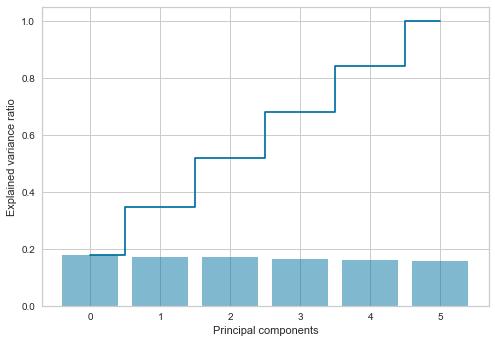

In [17]:
import numpy as np

plt.bar(range(6), pca_car.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(6), np.cumsum(pca_car.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

We can see on the figure above that to get more or less of 83% of the variance, we have to choose 4 principal components to reduce the data set. So, on the next 2 steps, dimension reduction with PCA is performed with the attributes training set.

In the first step we will fit the model with the training set and apply the dimensionality reduction on the same set. Then on the second step, it will be applied dimensionality reduction on the test set.

In [18]:
# Only 4 components
pca_car = PCA(n_components=4)
X_car_train_pca = pca_car.fit_transform(X_car_train_std)
print(pca_car)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [19]:
X_car_test_pca = pca_car.transform(X_car_test_std)

Here two figures are drawn. The figure on the left, represents the data in which PCA was performed, and as the values of "class values" vary between 1 and 4, it was divided into regioes such that, the red region represents the "class values" with value 1, the green region represents the "class values" with value 2, and so on until the fourth region with color yellow, representing the value 4.

The figure on the right, performs PCA with the test set, and so regions represents the values described before.

As we can notice, PCA did not performed well, since it was not possible to separate the components.
This may be due to the values of the principal components are very similar and it is not possible to find at least two principal components in which their sum represent the classification information contained in the feature set.

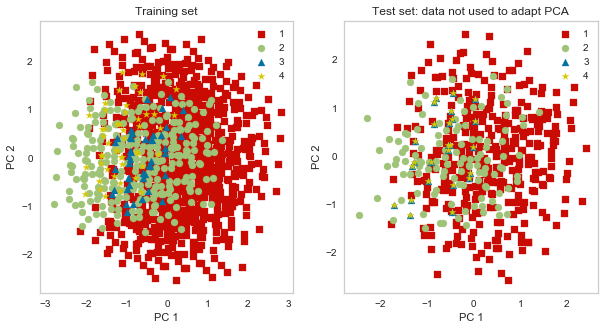

In [20]:
# Y values vary betwwen 1 and 4
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure

inx=(Y_car_train == 1) # 1,
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0],X_car_train_pca[inx,1],marker='s',color='r',label='1')   

inx=(Y_car_train == 2) # 2
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0],X_car_train_pca[inx,1],marker='o',color='g',label='2') 

inx=(Y_car_train == 3) # 3
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0],X_car_train_pca[inx,1],marker='^',color='b',label='3')  

inx=(Y_car_train == 4) # 4
inx=inx.ravel()
ax.scatter(X_car_train_pca[inx,0],X_car_train_pca[inx,1],marker='*',color='Y',label='4') 

ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure

inx=(Y_car_test == 1) # 1
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='s',color='r',label='1')  

inx=(Y_car_test == 2) # 2
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='o',color='g',label='2')

inx=(Y_car_test == 3) # 3
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='^',color='b',label='3')

inx=(Y_car_test == 3) # 4
inx=inx.ravel()
ax.scatter(X_car_test_pca[inx,0],X_car_test_pca[inx,1],marker='*',color='y',label='4')
    
ax.set_title("Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#### Car Kernel PCA

Kernel Principal Component Analysis (Kernel PCA) is an extension of Principal Component Xnalysis using techniques of kernel methods. Using a kernel, normally the Radial Basis Function (RBF) kernel, this technique tries to separate data for multi-variate classes, which is our type of data.

So, like in PCA we will try to separate into 4 principal components.

In the first step we will fit the model with the training set and apply the dimensionality reduction on the same set. Then on the second step, it will be applied dimensionality reduction on the test set.

In [21]:
from sklearn.decomposition import KernelPCA

kpca_car = KernelPCA(n_components = 4, kernel= 'rbf', gamma=15)
X_skpca_car = kpca_car.fit_transform(X_car_train_std)

In [22]:
X_car_test_kpca = kpca_car.transform(X_car_test_std)

Here two figures are drawn. The figure on the left, represents the data in which KPCA was performed, and as the values of "class values" vary between 1 and 4, it was divided into regioes such that, the red region represents the "class values" with value 1, the green region represents the "class values" with value 2, and so on until the fourth region with color yellow, representing the value 4.

The figure on the right, performs KPCA with the test set, and so regions represents the values described before. 

Just like PCA, KPCA did not performed well, since it was not possible to separate the components.
This may be due to the values of the principal components are very similar and it is not possible to find at least two principal components in which their sum represent the classification information contained in the feature set.

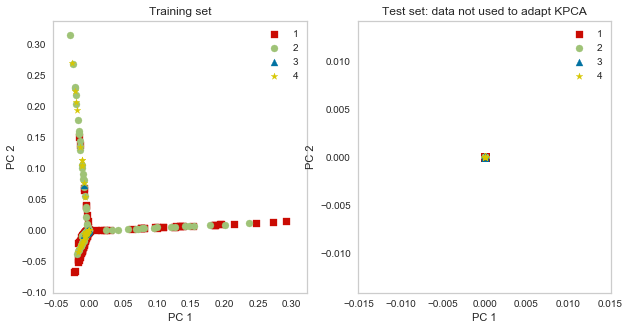

In [23]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()

ax = axes[0]
ax.figure

inx=(Y_car_train == 1) # 1
inx=inx.ravel()
ax.scatter(X_skpca_car[inx,0],X_skpca_car[inx,1],marker='s',color='r',label='1') 

inx=(Y_car_train == 2) # 2
inx=inx.ravel()
ax.scatter(X_skpca_car[inx,0],X_skpca_car[inx,1],marker='o',color='g',label='2') 

inx=(Y_car_train == 3) # 3
inx=inx.ravel()
ax.scatter(X_skpca_car[inx,0],X_skpca_car[inx,1],marker='^',color='b',label='3') 

inx=(Y_car_train == 4) # 4
inx=inx.ravel()
ax.scatter(X_skpca_car[inx,0],X_skpca_car[inx,1],marker='*',color='y',label='4') 

ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure

inx=(Y_car_test == 1) # 1
inx=inx.ravel()
ax.scatter(X_car_test_kpca[inx,0],X_car_test_kpca[inx,1],marker='s',color='r',label='1')  

inx=(Y_car_test == 2) # 2
inx=inx.ravel()
ax.scatter(X_car_test_kpca[inx,0],X_car_test_kpca[inx,1],marker='o',color='g',label='2')

inx=(Y_car_test == 3) # 3
inx=inx.ravel()
ax.scatter(X_car_test_kpca[inx,0],X_car_test_kpca[inx,1],marker='^',color='b',label='3')

inx=(Y_car_test != 4) # 4
inx=inx.ravel()
ax.scatter(X_car_test_kpca[inx,0],X_car_test_kpca[inx,1],marker='*',color='y',label='4')
    
ax.set_title("Test set: data not used to adapt KPCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Task B: Car Model training 

- [Car Dataset partition](#Car-Dataset-partition)
- [Car SVM classfiers](#Car-SVM-classifiers)
    - [Car SVM linear kernel](#Car-SVM-linear-kernel)
    - [Car SVM polynomial kernel](#Car-SVM-polynomial-kernel)
    - [Car SVM rbf kernel](#Car-SVM-rbf-kernel)
    - [Car SVM sigmoid kernel](#Car-SVM-sigmoid-kernel)
- [Car Multi-layer Perceptron](#Car-Multi-layer-Perceptron)
- [Car K-Nearest Neighbors](#Car-K-Nearest-Neighbors)
- [Car Decision tree](#Car-Decision-tree)
- [Car Random forest](#Car-Random-forest)
- [Car Gradient boosting](#Car-Gradient-boosting)
- [Car Preliminary results](#Car-Preliminary-results)

### Car Dataset partition

Here, is applied the holdout data set partition, which consist in partitioning the feature set in the following way:
30% of the data set will be partitioned for testing and the remaing 70% will be partitioned for training the classifiers.

In [24]:
from sklearn.model_selection import train_test_split
#holdout dataset partition
# 70% of dataset used for training the model
# 30% of dataset used to test the model
test_frac = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X_train_std,labels_car, test_size = test_frac)

### Car SVM classifiers

Support Vector Machines (SVMs) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis and the SVM algorithm is implemented in practice using a kernel: linear, polynomial,radial basis function and sigmoid. The kernel defines the similarity or a distance measure between new data and the support vectors and can be used that transform the input space into higher dimensions. This is called the Kernel Trick.

It is desirable to use more complex kernels as it allows lines to separate the classes that are curved or even more complex. This in turn can lead to more accurate classifiers.

#### Car SVM linear kernel

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_lin_score = accuracy_score(Y_test, predictions)
print('Linear SVM Accuracy: {:.2%}'.format(svm_lin_score))

Linear SVM Accuracy: 84.20%


#### Car SVM polynomial kernel

The degree of the polynomial must be specified, and it was choosen a kerner with degree 2.

In [26]:
svc = SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_poly_score = accuracy_score(Y_test, predictions)
print('Polynomial SVM Accuracy: {:.2%}'.format(svm_poly_score))

Polynomial SVM Accuracy: 69.36%


#### Car SVM rbf kernel

In [27]:
svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_rbf_score = accuracy_score(Y_test, predictions)
print('RBF SVM Accuracy: {:.2%}'.format(svm_rbf_score))

RBF SVM Accuracy: 95.18%


#### Car SVM sigmoid kernel

In [28]:
svc = SVC(kernel='sigmoid', C=1.0)
svc.fit(X_train, Y_train)
predictions = svc.predict(X_test)
svm_sigm_score = accuracy_score(Y_test, predictions)
print('Sigmoid SVM Accuracy: {:.2%}'.format(svm_sigm_score))

Sigmoid SVM Accuracy: 71.68%


### Car Multi-layer Perceptron

A multilayer perceptron (MLP) is a class of feedforward artificial neural network. An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer, where all the layers are fully connected. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training. Its multiple layers and non-linear activation distinguish MLP from a linear perceptron.

In Multilayer Perceptrons some neurons use a nonlinear activation function to model the frequency of action potentials.

Its learning algorithm  occurs by changing connection weights after each piece of data is processed, based on the amount of error in the output compared to the expected result. 

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp.fit(X_train, Y_train)
predictions = mlp.predict(X_test)
mlp_score = accuracy_score(Y_test, predictions)
print('MLP Accuracy: {:.2%}'.format(mlp_score))

MLP Accuracy: 95.95%


### Car K-Nearest Neighbors 

The k-nearest neighbors algorithm is a non-parametric method used for both classification and regression. In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

Since our case is classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k (positive integer) nearest neighbors.

So it was chosen a value of leaf_size of 30, 5 for k, the default metric is minkowski, and with the value p is 2, which is equivalent to the standard Euclidean metric, and weights are uniform, making all points in each neighborhood are weighted equally and the algoritm to compute the nearest neighbours is 'auto', so that, it will attempt to decide the most appropriate algorithm based on the values passed to fit method.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
predictions = knn.predict(X_test)
knn_score = accuracy_score(Y_test, predictions)
print("KNN Accuracy: {:.2%}".format(knn_score))

KNN Accuracy: 93.64%


### Car Decision tree

Decision trees are a non-parametric supervised learning method used for classification and regression, and it uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.Their goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Is a flowchart-like structure in which each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

We decided to use the default criteria to measure the quality of the split.

In [31]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='gini')
tree.fit(X_train,Y_train)
tree_score = tree.score(X_test,Y_test)
print('Decision Tree Accuracy: {:.2%}'.format(tree_score))

Decision Tree Accuracy: 96.34%


### Car Random forest

Random forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees and uses averaging to improve the predictive accuracy and control over-fitting

To the maximum depth of the tree we choosed 3, existing 10 tress in the forest, the minimum number of samples to split an internal node is 5, the number of features to consider when looking for the best split is 'log2' and finnaly it is not used out-of-bag samples to estimate the generalization accuracy.

In [32]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=10, max_features='log2', oob_score=False)	
forest.fit(X_train,Y_train)
rf_score = forest.score(X_test,Y_test)
print('Random Forest Accuracy: {:.2%}'.format(rf_score))

Random Forest Accuracy: 81.31%


### Car Gradient boosting

Gradient boosting is a technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees (weak learners) that are combined to yield a powerful single model, in an iterative fashion. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

The number of boosting stages to perform is the value by default (100), the contribution of each tree is 1.0 and the maximum depth of the individual regression estimators is 1.

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, Y_train)
gb_score = clf.score(X_test, Y_test)  
print('Gradient Boosting Accuracy: {:.2%}'.format(gb_score))

Gradient Boosting Accuracy: 92.68%


### Car Preliminary results

In [34]:
from IPython.display import HTML, display

data = [['Classifier','Accuracy results'],
        ['SVM Linear', svm_lin_score],
        ['SVM Polynomial',svm_poly_score],
        ['SVM RBF',svm_rbf_score],
        ['SVM Sigmoid',svm_sigm_score],
        ['MLP', mlp_score],
        ['KNN', knn_score,],
        ['Decision tree', tree_score],
        ['Random forest', rf_score],
        ['Gradient boosting', gb_score]]

display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
)))

Classifier,Accuracy results
SVM Linear,0.842003853565
SVM Polynomial,0.693641618497
SVM RBF,0.95183044316
SVM Sigmoid,0.71676300578
MLP,0.959537572254
KNN,0.936416184971
Decision tree,0.963391136802
Random forest,0.813102119461
Gradient boosting,0.926782273603


By using 9 different classifer models in order to train and measure their accuracy we now know which classifiers perform the best for our problem, these being the Decision Tree, followed by MLP and SVM with RBF kernel classifiers. SVM with sigmoid kernel performed the worst out of them. By doing and obtaining these preliminary results we could then, in a later step, decide which classifiers to consider for parameter optimization (only done for dataset 2 in task C) that would allow us to pick and train the single best classifier for the problem at hand.

# Dataset 2 : White wine quality dataset

## Task A: Wine Pre-processing 

- [Wine CSV's File Reading](#Wine-CSV's-File-Reading)
- [Mapping numerical data to categorical](#Mapping-numerical-data-to-categorical)
- [Wine Attributes and classes sample values](#Wine-Attributes-and-classes-sample-values)
- [Wine Class distribution visualization](#Wine-Class-distribution-visualization)
- [Wine Dataset detailed description](#Wine-Dataset-detailed-description)
- [Correlation matrix heatmap](#Correlation-matrix-heatmap)
- [Wine Feature ranking](#Wine-Feature-ranking)
- [Wine feature scaling](#Wine-feature-scaling)
- [Wine dimension reduction](#Wine-dimension-reduction)
    - [Wine Principal Component Analysis (PCA)](#Wine-Principal-Component-Analysis-(PCA))
    - [Wine Kernel PCA](#Wine-Kernel-PCA)

### Wine CSV's File Reading

Just like in the previous data set, the first step of the pre-processing stage corresponds to the reading of the CSV file. Before procceeding any further lets also make sure our dataset is complete, meaning no missing values. As we can see below, there are no missing values for any of the existing attributes. In case there were missing values an adequate replacement strategy would have to be here considered, such as invalidating the row containing the missing value or to replace the missing value with the mean of the attribute it corresponds to.

In [35]:
# Load dataframes from data set CSV files
dataset_white = pd.read_csv('./white_wine.csv') # numerical: https://archive.ics.uci.edu/ml/datasets/Wine+Quality
dataset_white.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### Mapping numerical data to categorical

Here, the output of the feature set, 'quality' is rated between 1 to 10, however, for dividing the quality in three groups, we decided that wines with quality less or equal than 5 are bad, between 5 and 7 are medium and between 8 and 10 are good.

In [36]:
dataset_white['quality'] = dataset_white['quality'].apply(lambda value: 'bad' if value <= 5 else 'medium'
                                                         if value<= 7 else 'good')
dataset_white['quality'] = pd.Categorical(dataset_white['quality'],categories=['bad','medium','good'])

### Wine Attributes and classes sample values


With the dataset now loaded we can get a glimpse of its data and internal organization by visualizing its first five intances.
The first eleven columns correspond to the features of the data (fixed acidity, volatile acidity,....,alcohol) while the last one, "quality", corresponds to a metric that represents how good the wine, composed by the previous attributes, was rated on a scale between 1 to 10.

In [37]:
dataset_white.head() # shows only the first 5 instances on the data set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium


### Wine Class distribution visualization

Now that we know how the data is organized we can start to plot it in graphs to better grasp some of its inner properties such as class distribution. To the simple plotting and data analysis techniques of the dataset, data scientists give the name of __Univariate analysis__. It corresponds to the simplest form of data analysis or visualization where one is only concerned with analyzing one data attribute or variable and visualizing the same (in one dimension). Lets consider the class attribute and visualize its distribution:

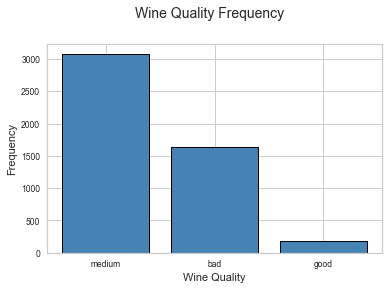

In [38]:
fig = plt.figure(figsize = (6, 4))
title = fig.suptitle("Wine Quality Frequency", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Wine Quality")
ax.set_ylabel("Frequency") 
white_quality = dataset_white['quality'].value_counts()
white_quality = (list(white_quality.index), list(white_quality.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(white_quality[0], white_quality[1], color='steelblue', 
        edgecolor='black', linewidth=1)

### Wine Dataset detailed description

Now lets apply the same technique to the whole dataset attributes in order to get a better understanding of the data distribution of these features. The describe() method of a dataframe can also give us some more detailed information for each of the datset attributes: the mean attribute value, the standard deviation, its minimum and maximum values and 25, 50 and 75 percentiles. The histograms below present helps visualize the value distribution of each attribute. From its analysis we can already observe some skewing in their distribution.

Dataset description
         fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000        

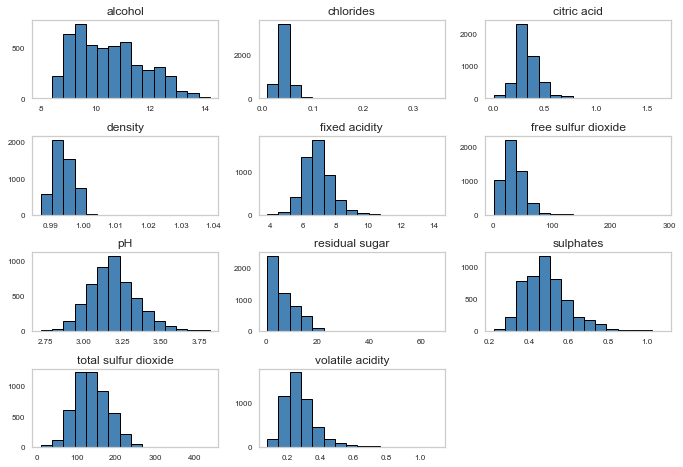

In [39]:
# Visualizing data in One Dimension(1-D)
print("Dataset description\n ", dataset_white.describe())
print()

dataset_white.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### Correlation matrix heatmap

In order to further study our dataset it is important to discover if there are any feature dependencies between features, usually designed as feature correlation, and which ones might influence the quality rating the most. Here we introduce the concept of  __Multivariate Analysis__ which involves the analysis of multiple data dimensions (attributes), referring to 2 or more. More than just analysing the attribute distributions it extends this analysis to discover possible existing relationships between attributes, as well as other patterns and correlations.

One of the best methods used to study this behavior is to compute and visualize the correlation matrix of the dataset. A scatterplot and a heatmap plot can be seen in the figures below, where pair-wise attributes properties are analysed together. From the analysis of the scatterplot it is possible to conclude that for some features the distribution appears to have a negative skew while for others the distribution is mostly linear, leading to the conclusion that there is, after all, some dependencies between pairs of features. 

On the same page, from the analysis of the heatmap it is clearly visible the strong correlations amongst features. For example the attribute pair "residual sugar" X "density" and "free sulfur dioxide" X "total sulfur dioxide" have higher dependencies (correlation) between them (indicated by the higher positive values of the heatmap). Simply put, this means that if one of those values where to increase, its pair attribute would also increase. It can also show us the inverse property, displayed in the squares with negative values, representing an inverse co-relationship. Meaning that the more one of those values increases, the more its pair decreases. The other remaining squares in the heatmap, with values close to zero, represent a lack of dependency between the features.

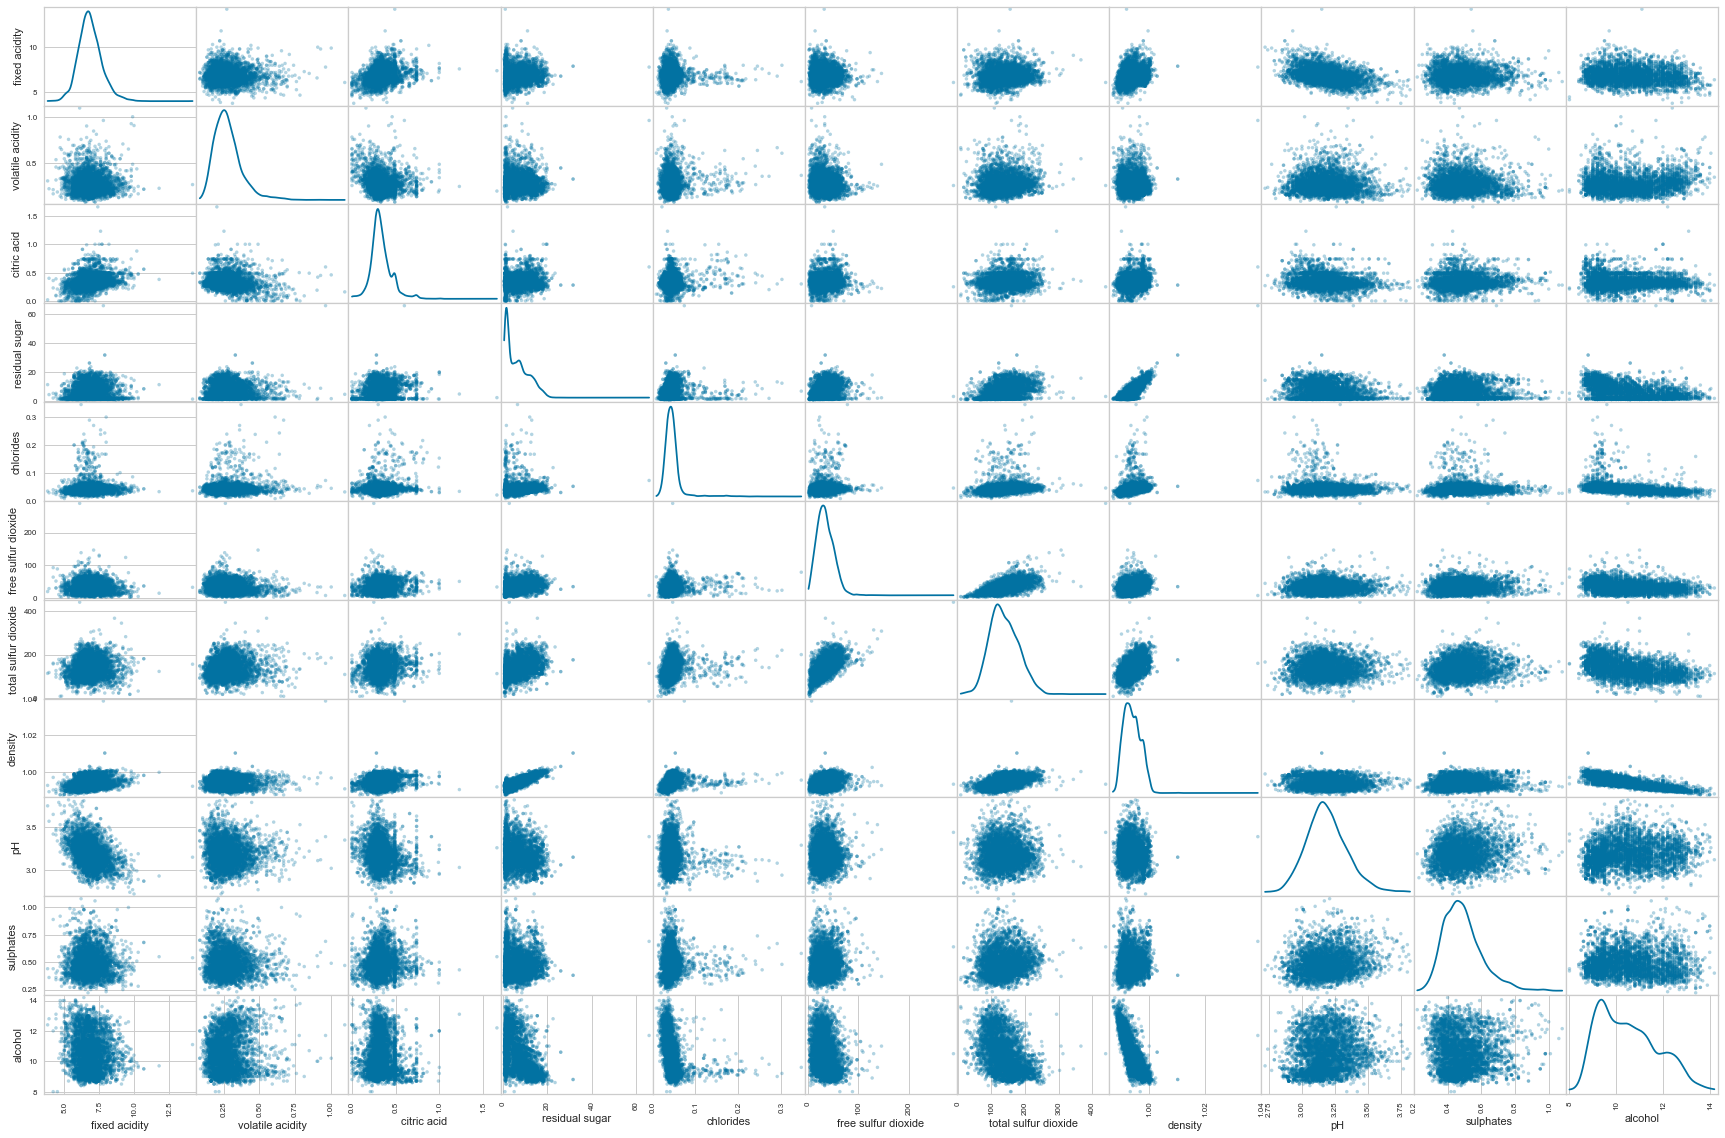

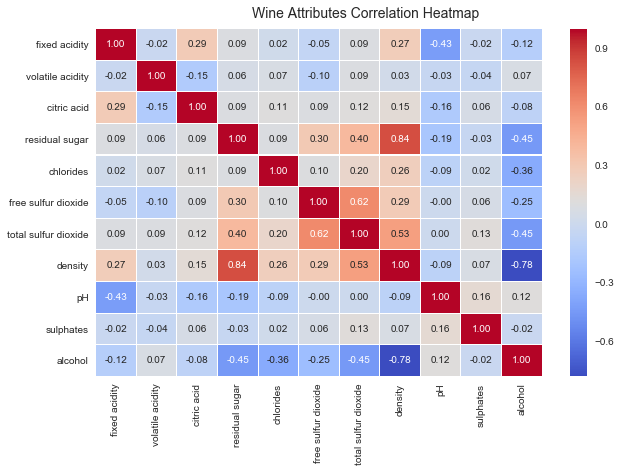

In [40]:
# Visualizing data in Two Dimensions (2-D)

# Scatterplot of dataset
pd.plotting.scatter_matrix(dataset_white, alpha = 0.3, figsize = (30,20), diagonal = 'kde');

# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = dataset_white.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

We can go further to comprove the accuracy of the correlations presented in the heatmap by studying some attribute pair. Let's then consider the pair above mentioned, "free sulfur dioxide" X "total sulfur dioxide, which have positive correlation, and the pair "density" X "alcohol" with negative correlation. In the following figure there is present both the regression plot of the two features and their respective distribution plots.

In the first figure the pair "density" X "alcohol" is displayed and it confirms that, being a negative value correlation pair in the heatmap (with value -0.78), as the values of alcohol increase, it's overall density decreases. The opposite occurrence is shown in the other figure where as the free sulfur dioxide values increases, the total sulfur dioxide increased aswell.

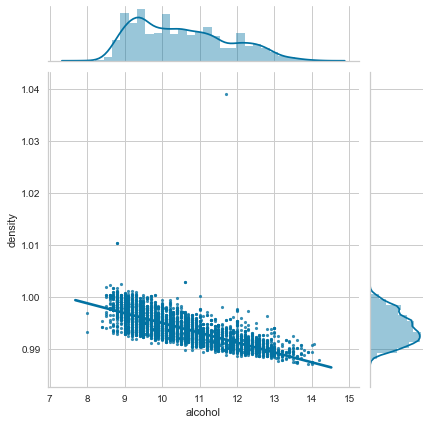

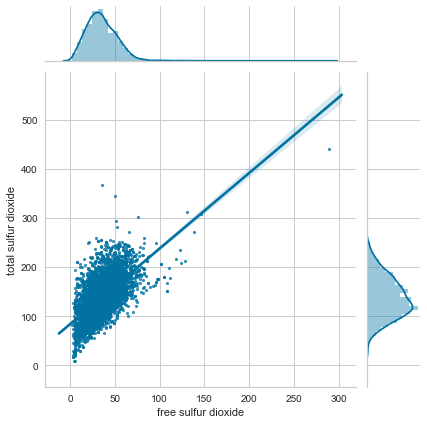

In [41]:
# We consider a new dataframe only for alcohol and density attributes
alcohol_density = dataset_white[['alcohol', 'density']] 

#Initialize a joint-grid with the dataframe, using seaborn library
gridA = sns.JointGrid(x="alcohol", y="density", data=alcohol_density, height=6) #Draw the regression plot
gridA = gridA.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridA = gridA.plot_marginals(sns.distplot) # Draw the distribution plot on the same figure

fso_tso = dataset_white[['free sulfur dioxide', 'total sulfur dioxide']]
gridB = sns.JointGrid(x="free sulfur dioxide", y="total sulfur dioxide", data=fso_tso, height=6)
gridB = gridB.plot_joint(sns.regplot, scatter_kws={"s": 10})
gridB = gridB.plot_marginals(sns.distplot)

### Wine Feature ranking 

One important step in data pre-processing is the identification and selection of the best features that are going to be used to solve the classification problem. Usually there are features in a dataset that are not relevant or redundant for the classifier and that can even, in fact, decrease the accuracy of the model. As such, the feature selection methods aid us in this mission of creating the accurate predictive model by choosing features that will give us a simillar or even better accuracy whilst requiring less data. One misconception that usually exists is that more attributes or column data has a direct correlation with the accuracy obtained, which is wrong. In fact, fewer attributes is sometimes the most desirable in a dataset, since it decreases the complexity of the model, making it simpler to analize and understand.

For our problem, we have considered two feature selection techniques: the __Shapiro-Wilk__ ranking algorithm and a __chi squared statistical test__ to select the 5 best features out of the existing 11.

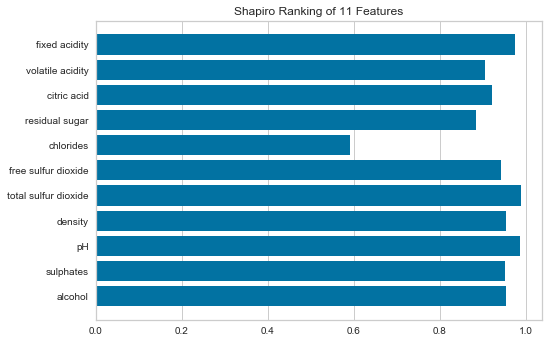

In [42]:
labels_wine = dataset_white.as_matrix(columns=[dataset_white.columns[-1]]) # Y
attributes_wine = dataset_white.as_matrix(columns=dataset_white.columns[0:11]) # X
features = list(dataset_white.columns[0:11])

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')
visualizer.fit(attributes_wine, labels_wine)	# Fit the data to the visualizer
visualizer.transform(attributes_wine)	# Transform the data
visualizer.poof()

Resulting scores:
[  4.516e+00   9.260e+00   2.039e-02   1.751e+02   1.828e+00   9.684e+00
   1.941e+03   3.478e-03   2.795e-01   3.775e-01   1.153e+02]

Resulting 5 best features:


[('total sulfur dioxide', 1941.3742794418542),
 ('residual sugar', 175.08021950496214),
 ('alcohol', 115.27921904504822),
 ('free sulfur dioxide', 9.6842518998941411),
 ('volatile acidity', 9.2595607793057564)]

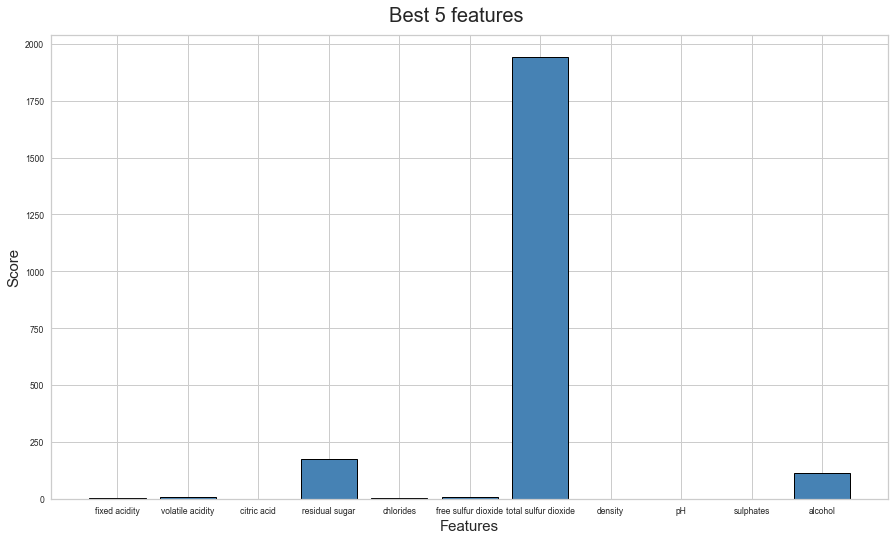

In [43]:
array = dataset_white.values
features = dataset_white.columns[0:11]
X = array[:,0:11]
Y = array[:,11]

# feature extraction
n_best_features = 5
test = SelectKBest(score_func=chi2, k=n_best_features)
fit = test.fit(X, Y)

# summarize scores
np.set_printoptions(precision=3)

# generalized code for obtaining any n_best_features
print("Resulting scores:\n{}".format(fit.scores_))
result = dict(zip(list(features),fit.scores_))
print("\nResulting {} best features:".format(n_best_features))
display(sorted(result.items(), key=lambda kv: kv[1], reverse=True)[0:n_best_features])

# scores plot
fig = plt.figure(figsize = (15, 8))
title = fig.suptitle("Best " + str(n_best_features) + " features", fontsize=20)
fig.subplots_adjust(top=0.93, wspace=0.1)
ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Features", fontsize=15)
ax.set_ylabel("Score", fontsize=15) 
scores = fit.scores_ 
d = (list(features),list(scores))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(d[0], d[1], color='steelblue', edgecolor='black', linewidth=1)

The Shapiro-Wilk method accesses the normality of the distribution of instances with respect to the feature and attributes it a score in the range [0,1]. From its application we can conclude that all the features have a simillar score, except for the chlorides which as the lowest score differing from the rest by approximately 0.3 units, which could be considered for removal.

The chi squared method however shows a different set of results, assigning the best score to "total sulfur dioxide", followed by "residual sugar", "alcohol", "free sulfur dioxide" and "volatile acidity". For this case we obtain, however, a great diversity between the scores of the features. These values also greately diverge from the ones obtained in the Shapiro-Wilk approach which could not allow the establishment of a correlation pattern. As such we decided that these results obtained were inconclusive and decided to keep the original features of the dataset to train our classifiers. To solve this problem and obtain a more accurate scoring result we would need to carefully dissect each ranking method, investigate further and possibly implement and compare the results to other ranking methods such as Recursive Feature Elimination or Feature Importance scores used in the ensemble classificators, which was not possible due to time constraints. 


The whitepaper "Selection of important features and predicting wine quality using machine learning techniques", discovered in a later stage of the development of the project, does an extensive research on the best feature selection for both SVM and neural networks and could be a useful resource for posterior analysis. The authors conclude that fixed  acidity,  volatile  acidity,  residual  sugar,  free  sulfur  dioxide,  density,  pH, sulphates and alcohol are the best parameters for the white wine dataset.

source: https://www.sciencedirect.com/science/article/pii/S1877050917328053

### Wine feature scaling

Feature scaling corresponds to an often necessary step to standardize the range of features of the dataset. It is done because usually the range of values of the original data varies widely and, due to this, some machine learning algorithms will not work properly without this extra processing step. Some classification algorithm require algebric calculations, usually distances between points using the Euclidean distance. As such, if the values used in the operations are not normalized, the feature containing the broad range of values will heavily influence its the operation outcome, which is not desired. All features should then be normalized so that each feature contributes approximately proportionately to the final distance calculated.
For our solution, we used the already developed scaling operator in sklean StandardScaler() that normalizes all the attribute values accordingly.

In [44]:
sc = StandardScaler()
sc.fit(attributes_wine)
X_white_train_std = sc.transform(attributes_wine)

### Wine dimension reduction

#### Wine Principal Component Analysis (PCA)


Here, the data is divided into training and test sets, so 30% of the data set is divided for testing and the remaining 70% is used for training.

In [45]:
X_wine_train, X_wine_test, Y_wine_train, Y_wine_test = \
    train_test_split(attributes_wine, labels_wine, test_size=0.3, random_state=0)

Before applying PCA, the feature set must be normalized. If a feature set has data expressed in units for different features the variance scale is huge in the training set. So data is scaled in order to avoid false results.

In [46]:
sc = StandardScaler()
X_wine_train_std = sc.fit_transform(X_wine_train)
X_wine_test_std = sc.transform(X_wine_test)

In the code below, is created a PCA object named pca_wine. We did not specify the number of components in the constructor so that we can know the values of variance of the principal components.
We can notice that the first three components are responsible for 55,1 % of the variance.

In [47]:
pca_wine = PCA()
X_wine_train_pca = pca_wine.fit_transform(X_wine_train_std)

pca_wine.explained_variance_ratio_

array([ 0.297,  0.142,  0.112,  0.095,  0.087,  0.084,  0.066,  0.054,
        0.037,  0.026,  0.001])

Here, a plot is drawn, in which we can notice that the variance ratio increases as the number of principal components also increases.

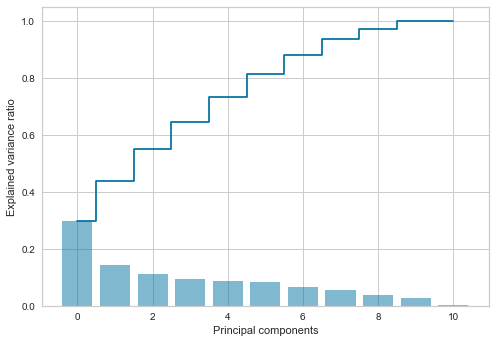

In [48]:
plt.bar(range(11), pca_wine.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(11), np.cumsum(pca_wine.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

We can see on the figure above that to get more or less of 87% of the variance, we have to choose 7 principal components to reduce the data set. So, on the next 2 steps, dimension reduction with PCA is performed with the attributes training set.

In the first step we will fit the model with the training set and apply the dimensionality reduction on the same set. Then on the second step, it will be applied dimensionality reduction on the test set.

In [49]:
# Only two components for illustration
pca_wine = PCA(n_components=7)
X_wine_train_pca = pca_wine.fit_transform(X_wine_train_std)
print(pca_wine)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [50]:
X_wine_test_pca = pca_wine.transform(X_wine_test_std)

Here two figures are drawn. The figure on the left, represents the data in which PCA was performed, and as the values of "quality" vary between bad, medium and good. So it was divided into regioes such that, the red region represents the "class values" with value 'bad', the blue region represents the "class values" with value 'medium', and the green region, representing the value 'good'.

The figure on the right, performs PCA with the test set, and so regions represents the values described before.

As we can notice, PCA did not performed well, since it was not possible to separate the components.
This may be due to the values of the principal components are very similar and it is not possible to find at least two principal components in which their sum represent the classification information contained in the feature set.

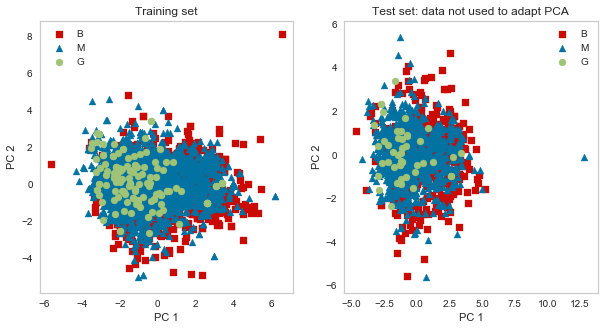

In [52]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure

inx=(Y_wine_train == 'bad')
inx=inx.ravel()
ax.scatter(X_wine_train_pca[inx,0],X_wine_train_pca[inx,1],marker='s',color='r',label='B') # Bad 

inx=(Y_wine_train == 'medium')
inx=inx.ravel()
ax.scatter(X_wine_train_pca[inx,0],X_wine_train_pca[inx,1],marker='^',color='b',label='M') # Medium

inx=(Y_wine_train == 'good')
inx=inx.ravel()
ax.scatter(X_wine_train_pca[inx,0],X_wine_train_pca[inx,1],marker='o',color='g',label='G') # Good

ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure

inx=(Y_wine_test == 'bad') 
inx=inx.ravel()
ax.scatter(X_wine_test_pca[inx,0],X_wine_test_pca[inx,1],marker='s',color='r',label='B') 

inx=(Y_wine_test == 'medium') 
inx=inx.ravel()
ax.scatter(X_wine_test_pca[inx,0],X_wine_test_pca[inx,1],marker='^',color='b',label='M')

inx=(Y_wine_test == 'good')
inx=inx.ravel()
ax.scatter(X_wine_test_pca[inx,0],X_wine_test_pca[inx,1],marker='o',color='g',label='G')
    
ax.set_title("Test set: data not used to adapt PCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#### Wine Kernel PCA

Like in PCA we will try to separate into 7 principal components.

In the first step we will fit the model with the training set and apply the dimensionality reduction on the same set. Then on the second step, it will be applied dimensionality reduction on the test set.

In [53]:
kpca_wine = KernelPCA(n_components = 5, kernel= 'rbf', gamma=15)
X_skpca_wine = kpca_wine.fit_transform(X_wine_train_std)

In [54]:
X_wine_test_kpca = kpca_wine.transform(X_wine_test_std)

Here two figures are drawn. The figure on the left, represents the data in which KPCA was performed, and as the values of "quality" vary between bad, medium and good. So it was divided into regioes such that, the red region represents the "class values" with value 'bad', the blue region represents the "class values" with value 'medium', and the green region, representing the value 'good'.

The figure on the right, performs KPCA with the test set, and so regions represents the values described before.

Just like PCA, KPCA did not performed well, since it was not possible to separate the components.
This may be due to the values of the principal components are very low and it is not possible to find at least two principal components in which their sum represent the classification information contained in the feature set.

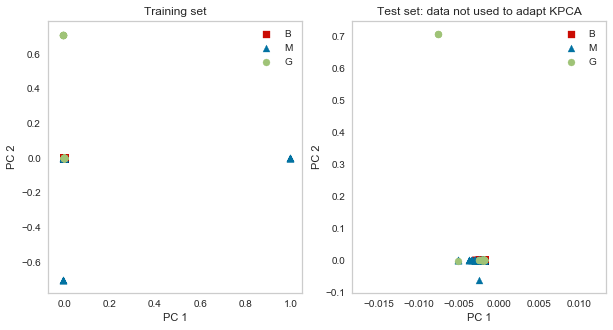

In [55]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
axes = axes.ravel()   
ax = axes[0]
ax.figure

#inx=(Y_wine_train <= 5) # 1, 2, 3, 4, 5
inx=(Y_wine_train == 'bad') # 1, 2, 3, 4, 5
inx=inx.ravel()
ax.scatter(X_skpca_wine[inx,0],X_skpca_wine[inx,1],marker='s',color='r',label='B') # Bad 

#inx=(Y_wine_train >= 6) # 6, 7, 8, 9, 10
inx=(Y_wine_train == 'medium') # 1, 2, 3, 4, 5
inx=inx.ravel()
ax.scatter(X_skpca_wine[inx,0],X_skpca_wine[inx,1],marker='^',color='b',label='M') # Medium

#inx=(Y_wine_train >= 6) # 6, 7, 8, 9, 10
inx=(Y_wine_train == 'good') # 1, 2, 3, 4, 5
inx=inx.ravel()
ax.scatter(X_skpca_wine[inx,0],X_skpca_wine[inx,1],marker='o',color='g',label='G') # Good

ax.set_title("Training set")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()
ax.grid()

ax = axes[1]
ax.figure

inx=(Y_wine_test == 'bad') 
inx=inx.ravel()
ax.scatter(X_wine_test_kpca[inx,0],X_wine_test_kpca[inx,1],marker='s',color='r',label='B') # Bad

inx=(Y_wine_test == 'medium')
inx=inx.ravel()
ax.scatter(X_wine_test_kpca[inx,0],X_wine_test_kpca[inx,1],marker='^',color='b',label='M') # Medium

inx=(Y_wine_test == 'good')
inx=inx.ravel()
ax.scatter(X_wine_test_kpca[inx,0],X_wine_test_kpca[inx,1],marker='o',color='g',label='G') # Good
    
ax.set_title("Test set: data not used to adapt KPCA")    

ax.legend() 
ax.grid()
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

## Task B: Wine Model Training

- [Wine Dataset partition](#Wine-Dataset-partition)
- [Wine SVM classfiers](#Wine-SVM-classifiers)
    - [Wine SVM linear kernel](#Wine-SVM-linear-kernel)
    - [Wine SVM polynomial kernel](#Wine-SVM-polynomial-kernel)
    - [Wine SVM rbf kernel](#Wine-SVM-rbf-kernel)
    - [Wine SVM sigmoid kernel](#Wine-SVM-sigmoid-kernel)
- [Wine Multi-layer Perceptron](#Wine-Multi-layer-Perceptron)
- [Wine K-Nearest Neighbors](#Wine-K-Nearest-Neighbors)
- [Wine Decision tree](#Wine-Decision-tree)
- [Wine Random forest](#Wine-Random-forest)
- [Wine Gradient boosting](#Wine-Gradient-boosting)
- [Wine Preliminary results](#Wine-Preliminary-results)

### Wine Dataset partition

Here, is applied the holdout data set partition, which consist in partitioning the feature set in the following way:
30% of the data set will be partitioned for testing and the remaing 70% will be partitioned for training the classifiers.

In [56]:
X_white_train, X_white_test, Y_white_train, Y_white_test = \
    train_test_split(X_white_train_std, labels_wine, test_size = test_frac)

### Wine SVM classfiers

#### Wine SVM linear kernel

In [57]:
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_lin_score = accuracy_score(Y_white_test, predictions)
print('Linear SVM Accuracy: {:.2%}'.format(svm_lin_score))

Linear SVM Accuracy: 72.31%


#### Wine SVM polynomial kernel

In [58]:
svc = SVC(kernel='poly', degree=2, C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_poly_score = accuracy_score(Y_white_test, predictions)
print('Polynomial SVM Accuracy: {:.2%}'.format(svm_poly_score))

Polynomial SVM Accuracy: 68.23%


#### Wine SVM rbf kernel

In [59]:
svc = SVC(kernel='rbf', C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_rbf_score = accuracy_score(Y_white_test, predictions)
print('RBF SVM Accuracy: {:.2%}'.format(svm_rbf_score))

RBF SVM Accuracy: 73.67%


#### Wine SVM sigmoid kernel

In [60]:
svc = SVC(kernel='sigmoid', C=1.0)
svc.fit(X_white_train, Y_white_train)
predictions = svc.predict(X_white_test)
svm_sigm_score = accuracy_score(Y_white_test, predictions)
print('Sigmoid SVM Accuracy: {:.2%}'.format(svm_sigm_score))

Sigmoid SVM Accuracy: 64.56%


### Wine Multi-layer Perceptron

In [61]:
mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,5),alpha=0.01, max_iter=5000)
mlp.fit(X_white_train, Y_white_train)
predictions = mlp.predict(X_white_test)
mlp_score = accuracy_score(Y_white_test, predictions)
print('MLP Accuracy: {:.2%}'.format(mlp_score))

MLP Accuracy: 72.99%


### Wine K-Nearest Neighbors

In [68]:
knn = KNeighborsClassifier()
knn.fit(X_white_train, Y_white_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2, weights='uniform')
predictions = knn.predict(X_white_test)
knn_score = accuracy_score(Y_white_test, predictions)
print("KNN Accuracy: {:.2%}".format(knn_score))

KNN Accuracy: 72.52%


### Wine Decision tree

In [63]:
from sklearn import tree

tree = tree.DecisionTreeClassifier(criterion='gini')
tree.fit(X_white_train,Y_white_train)
tree_score = tree.score(X_white_test,Y_white_test)
print('Decision Tree Accuracy: {:.2%}'.format(tree_score))

Decision Tree Accuracy: 74.63%


### Wine Random forest

In [64]:
forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=10, max_features='log2', oob_score=False)	
forest.fit(X_white_train,Y_white_train)
rf_score = forest.score(X_white_test,Y_white_test)
print('Random Forest Accuracy: {:.2%}'.format(rf_score))

Random Forest Accuracy: 71.16%


### Wine Gradient boosting

In [65]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_white_train, Y_white_train)
gb_score = clf.score(X_white_test, Y_white_test)  
print('Gradient Boosting Accuracy: {:.2%}'.format(gb_score))

Gradient Boosting Accuracy: 73.67%


### Wine Preliminary results

In [66]:
data = [['Classifier','Accuracy results'],
        ['SVM Linear', svm_lin_score],
        ['SVM Polynomial',svm_poly_score],
        ['SVM RBF',svm_rbf_score],
        ['SVM Sigmoid',svm_sigm_score],
        ['MLP', mlp_score],
        ['KNN', knn_score,],
        ['Decision tree', tree_score],
        ['Random forest', rf_score],
        ['Gradient boosting', gb_score]]


display(HTML(
    '<table><tr>{}</tr></table>'.format(
        '</tr><tr>'.join(
            '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
)))

Classifier,Accuracy results
SVM Linear,0.723129251701
SVM Polynomial,0.68231292517
SVM RBF,0.736734693878
SVM Sigmoid,0.645578231293
MLP,0.729931972789
KNN,0.725170068027
Decision tree,0.746258503401
Random forest,0.71156462585
Gradient boosting,0.736734693878


By using 9 different classifer models in order to train and measure their accuracy we now know which classifiers perform the best for our problem, these being the Decision Tree, SVM RBF and Gradient boosting. SVM with sigmoid kernel performed, in similar fashion as for the car dataset, the worst out of them. By doing and obtaining these preliminary results we can decide which classifiers we would consider for task C, where we will find the single best classifier and its hyperparameters for the problem here considered.

## References

Principal Component Analysis: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

Kernel PCA: https://plot.ly/scikit-learn/plot-kernel-pca/

The Art of Effective Visualization of Multi-dimensional Data: https://towardsdatascience.com/the-art-of-effective-visualization-of-multi-dimensional-data-6c7202990c57

Model selection: choosing estimators and their parameters: http://gael-varoquaux.info/scikit-learn-tutorial/model_selection.html

An Introduction to Feature Selection: https://machinelearningmastery.com/an-introduction-to-feature-selection/

A Feature Selection Tool for Machine Learning: https://towardsdatascience.com/a-feature-selection-tool-for-machine-learning-in-python-b64dd23710f0

Rank features: http://www.scikit-yb.org/en/latest/api/features/rankd.html